# Figures for the SC 2021 paper "Efficient Large-Scale Language Model Training on GPU Clusters"

This notebook contains code to produce plots in the "Efficient Large-Scale Language Model Training on GPU Clusters" paper, accepted to SuperComputing 2021.

## Plotting functions

In [45]:
from matplotlib import pyplot as plt
import matplotlib
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from matplotlib import rc
import numpy as np
sns.set_style('ticks')
font = {
    'font.family':'Roboto',
    'font.size': 12,
}
sns.set_style(font)
paper_rc = {
    'lines.linewidth': 3,
    'lines.markersize': 10,
}
sns.set_context("paper", font_scale=2, rc=paper_rc)
current_palette = sns.color_palette()


def plot(throughputs,
         xticks,
         xlabel,
         ylabel="Achieved teraFLOP/s\nper GPU",
         yticks=None,
         ylim=None,
         ncol=1,
         move_legend=False,
         output_filename=None):
    plt.figure(figsize=(7.5, 3))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    markers = ['o', 'D', '^', 's']
    for i, label in enumerate(throughputs):
        if label is not None:
            ax.plot(range(min(len(xticks),
                              len(throughputs[label]))),
                    throughputs[label],
                    label=label, marker=markers[i])
        else:
            ax.plot(range(len(xticks)), throughputs[label],
                    marker=markers[i])
    
    ax.set_xticks(range(len(xticks)))
    ax.set_xticklabels(xticks)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    if yticks is not None:
        ax.set_yticks(yticks)
    if ylim is not None:
        ax.set_ylim(*ylim)
    else:
        ax.set_ylim(0, 200)
    sns.despine()
    
    if move_legend:
        leg = plt.figlegend(frameon=False, ncol=ncol)
        bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
        yOffset = 0.25
        xOffset = -0.2
        bb.y0 += yOffset
        bb.y1 += yOffset
        bb.x0 += xOffset
        bb.x1 += xOffset
        leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
    else:
        plt.legend(frameon=False, ncol=ncol)
    
    if output_filename is not None:
        with PdfPages(output_filename) as pdf:
            pdf.savefig(bbox_inches='tight')
            
    plt.show()

    
def plot_model_trend(model_sizes,
                     xticks,
                     yticks,
                     output_filename=None):
    plt.figure(figsize=(7.5, 3))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    x_values = [model_sizes[label][1] for label in model_sizes]
    y_values = [model_sizes[label][0] for label in model_sizes]
    import math
    m, b = np.polyfit(x_values, [math.log(y) for y in y_values], 1)
    y_values_fit = [math.exp(m*x + b) for x in xticks]
    ax.plot(x_values, y_values,
            marker='o')
    ax.plot(xticks, y_values_fit, linestyle='dotted',
            color='red')
    
    for label in model_sizes:
        (y, x) = model_sizes[label]
        if label.startswith("Turing-NLG"):
            ax.annotate(label, xy=(x+0.05, y*0.5))
        else:
            ax.annotate(label, xy=(x+0.05, y*0.3))
    sns.despine()
    
    ax.set_yscale('log')
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of parameters\n(in billions)")
    
    if output_filename is not None:
        with PdfPages(output_filename) as pdf:
            pdf.savefig(bbox_inches='tight')
            
    plt.show()
    

def plot_comparison_with_zero(throughputs,
                              xticks,
                              xlabel,
                              ylabel,
                              yticks=None,
                              ylim=None,
                              ncol=1,
                              output_filename=None):
    plt.figure(figsize=(7.5, 3))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    markers = ['o', 'D', '^', 's']
    linestyles = ['--', '-']
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    for i, label in enumerate(throughputs):
        x_values = [a[0] for a in throughputs[label]]
        y_values = [a[1] for a in throughputs[label]]
        ax.plot(x_values, y_values,
                label=label, marker=markers[i],
                linestyle=linestyles[i%2],
                color=colors[i//2])
    
    ax.set_xticklabels(xticks)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_ylim(0, 200)
    sns.despine()
    
    leg = plt.figlegend(frameon=False, ncol=ncol)
    bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
    yOffset = 0.25
    xOffset = -0.2
    bb.y0 += yOffset
    bb.y1 += yOffset
    bb.x0 += xOffset
    bb.x1 += xOffset
    leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
    
    if output_filename is not None:
        with PdfPages(output_filename) as pdf:
            pdf.savefig(bbox_inches='tight')
            
    plt.show()

## Various plots

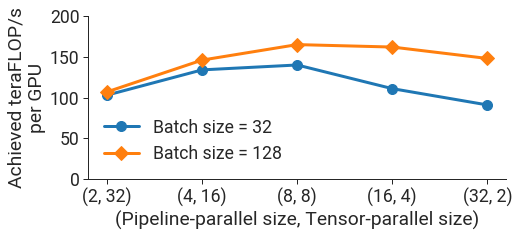

In [2]:
plot(
    {"Batch size = 32": [103, 134, 140, 111, 91],
     "Batch size = 128": [107, 146, 165, 162, 148]},
    ["(2, 32)", "(4, 16)", "(8, 8)", "(16, 4)", "(32, 2)"],
    xlabel="(Pipeline-parallel size, Tensor-parallel size)",
    output_filename="pipeline_and_tensor_model_parallelism.pdf"
)

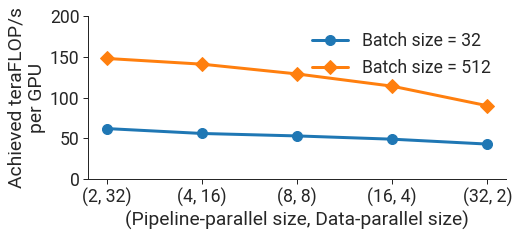

In [3]:
plot(
    {"Batch size = 32": [62, 56, 53, 49, 43],
     "Batch size = 512": [148, 141, 129, 114, 90]},
    ["(2, 32)", "(4, 16)", "(8, 8)", "(16, 4)", "(32, 2)"],
    xlabel="(Pipeline-parallel size, Data-parallel size)",
    output_filename="data_and_pipeline_model_parallelism.pdf"
)

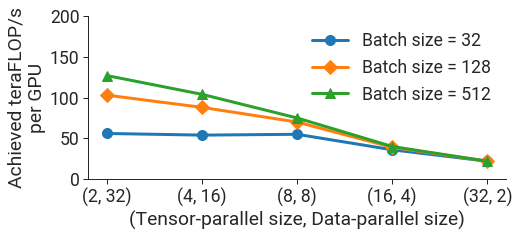

In [4]:
plot(
    {"Batch size = 32": [56, 54, 55, 36, 22],
     "Batch size = 128": [103, 88, 70, 39, 22],
     "Batch size = 512": [127, 104, 75, 40, 22]},
    ["(2, 32)", "(4, 16)", "(8, 8)", "(16, 4)", "(32, 2)"],
    xlabel="(Tensor-parallel size, Data-parallel size)",
    output_filename="data_and_tensor_model_parallelism.pdf"
)

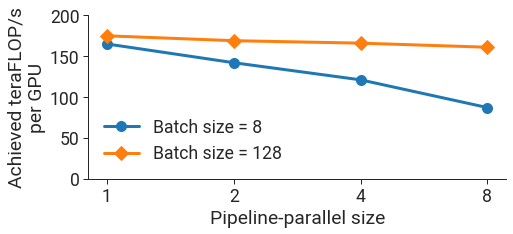

In [5]:
plot(
    {"Batch size = 8": [165, 142, 121, 87],
     "Batch size = 128": [175, 169, 166, 161]},
    ["1", "2", "4", "8"],
    xlabel="Pipeline-parallel size",
    output_filename="pipeline_parallelism_weak_scaling.pdf"
)

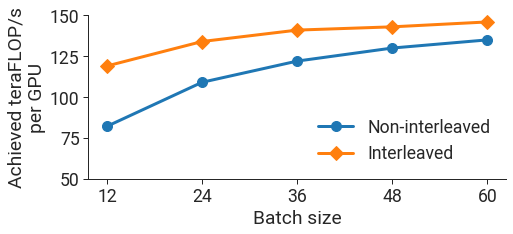

In [6]:
plot(
    {"Non-interleaved": [82, 109, 122, 130, 135],
     "Interleaved": [119, 134, 141, 143, 146]},
    ["12", "24", "36", "48", "60"],
    xlabel="Batch size",
    ylim=(50, 150),
    output_filename="gpt_175b_interleaved_vs_default.pdf"
)

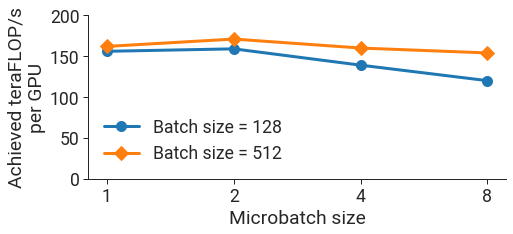

In [7]:
plot(
    {"Batch size = 128": [156, 159, 139, 120],
     "Batch size = 512": [162, 171, 160, 154]},
    ["1", "2", "4", "8"],
    xlabel="Microbatch size",
    output_filename="microbatch_size_91B.pdf"
)

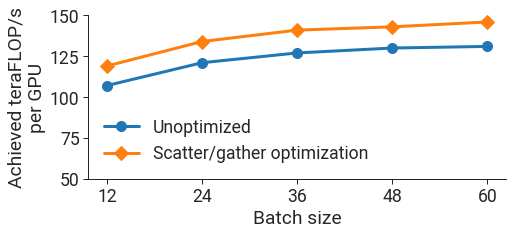

In [8]:
plot(
    {"Unoptimized": [107, 121, 127, 130, 131],
     "Scatter/gather optimization": [119, 134, 141, 143, 146]},
    ["12", "24", "36", "48", "60"],
    xlabel="Batch size",
    ylim=(50, 150),
    output_filename="gpt_175b_scatter_gather_optimization.pdf"
)

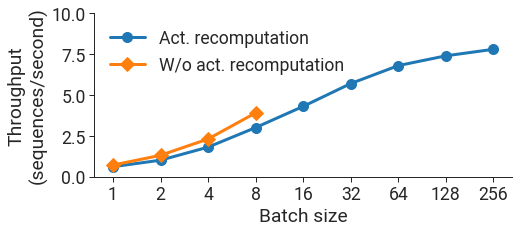

In [9]:
plot(
    {"Act. recomputation": [0.6, 1.0, 1.8, 3.0, 4.3, 5.7, 6.8, 7.4, 7.8],
     "W/o act. recomputation": [0.7, 1.3, 2.3, 3.9]},
    ["1", "2", "4", "8", "16", "32", "64", "128", "256"],
    xlabel="Batch size",
    ylabel="Throughput\n(sequences/second)",
    ylim=(0, 10),
    output_filename="gpt_145b_activation_recomputation.pdf"
)

No handles with labels found to put in legend.


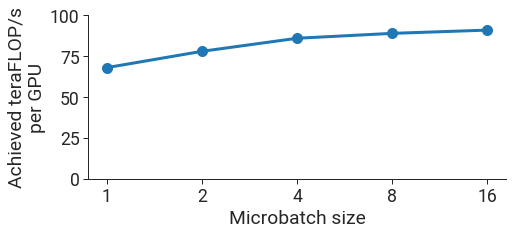

In [10]:
plot(
    {None: [68, 78, 86, 89, 91]},
    ["1", "2", "4", "8", "16"],
    xlabel="Microbatch size",
    ylim=(0, 100),
    output_filename="throughput_vs_microbatch_size.pdf"
)

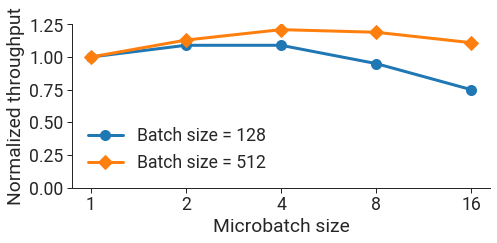

In [11]:
plot(
    {"Batch size = 128": [1.00, 1.09, 1.09, 0.95, 0.75],
     "Batch size = 512": [1.00, 1.13, 1.21, 1.19, 1.11]},
    ["1", "2", "4", "8", "16"],
    xlabel="Microbatch size",
    ylabel="Normalized throughput",
    ylim=(0, 1.25), yticks=[0.0, 0.25, 0.5, 0.75, 1.0, 1.25],
    output_filename="per_batch_time_estimate_vs_microbatch_size.pdf"
)

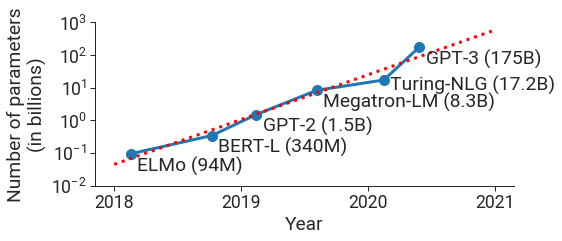

In [46]:
plot_model_trend(
    {"ELMo (94M)": (0.094, 2018.1315),
     "BERT-L (340M)": (0.34, 2018.7699),
     "GPT-2 (1.5B)": (1.5, 2019.1205),
     "Megatron-LM (8.3B)": (8.3, 2019.5973),
     "Turing-NLG (17.2B)": (17.2, 2020.1260),
     "GPT-3 (175B)": (175, 2020.4055)},
    xticks=[2018, 2019, 2020, 2021],
    yticks=[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
    output_filename="model_trend.pdf"
)

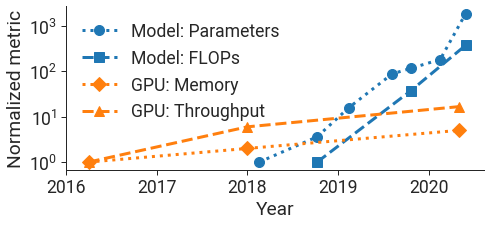

In [42]:
def plot_model_and_hardware_scaling(all_metrics,
                                    xticks,
                                    yticks,
                                    output_filename=None):
    plt.figure(figsize=(7.5, 3))
    ax = plt.subplot2grid((1, 1), (0, 0), colspan=1)
    markers = ['o', 's', 'D', '^']
    linestyles = [':', 'dashed']
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    for i, metric_label in enumerate(all_metrics):
        metrics = all_metrics[metric_label]
        labels = list(metrics.keys())
        x_values = [metrics[label][1] for label in labels]
        y_values = [metrics[label][0] / metrics[labels[0]][0] for label in labels]
        ax.plot(x_values, y_values, linestyle=linestyles[i%2],
                marker=markers[i], label=metric_label,
                color=colors[i//2])
    sns.despine()
    
    ax.set_yscale('log')
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_xlabel("Year")
    ax.set_ylabel("Normalized metric")
    
    plt.legend(frameon=False)
    
    if output_filename is not None:
        with PdfPages(output_filename) as pdf:
            pdf.savefig(bbox_inches='tight')
            
    plt.show()

plot_model_and_hardware_scaling(
    {
        "Model: Parameters":
         {
             "ELMo": (0.094, 2018.1315),
             "BERT-L": (0.34, 2018.7699),
             "GPT-2": (1.5, 2019.1205),
             "Megatron-LM": (8.3, 2019.5973),
             "T5": (11, 2019.8027),
             "Turing-NLG": (17.2, 2020.1260),
             "GPT-3": (175, 2020.4055)},
        "Model: FLOPs":
         {
             "BERT-L": (8, 2018.7699),
             "T5": (300, 2019.8027),
             "GPT-3": (3000, 2020.4055)},
        "GPU: Memory":
         {
             "P100": (16, 2016.25),
             "V100": (32, 2018),
             "A100": (80, 2020.33)
         },
        "GPU: Throughput":
         {
             "P100": (18.7, 2016.25),
             "V100": (112, 2018),
             "A100": (312, 2020.33)
         },
    }
    ,
    xticks=[2016, 2017, 2018, 2019, 2020],
    yticks=[1.0, 10.0, 100.0, 1000.0],
    output_filename="model_and_hardware_scaling.pdf"
)

<ipython-input-1-87600f7c96cb>:60: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


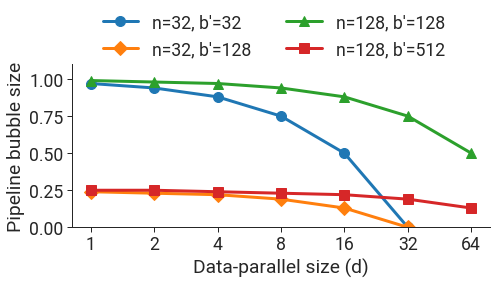

In [13]:
plot(
    {"n=32, b'=32": [0.97, 0.94, 0.88, 0.75, 0.50, 0.00],
     "n=32, b'=128": [0.24, 0.23, 0.22, 0.19, 0.13, 0.00],
     "n=128, b'=128": [0.99, 0.98, 0.97, 0.94, 0.88, 0.75, 0.50],
     "n=128, b'=512": [0.25, 0.25, 0.24, 0.23, 0.22, 0.19, 0.13]},
    ["1", "2", "4", "8", "16", "32", "64"],
    xlabel="Data-parallel size (d)",
    ylabel="Pipeline bubble size",
    ylim=(0, 1.1), yticks=[0.0, 0.25, 0.5, 0.75, 1.0, 1.25],
    ncol=2,
    move_legend=True,
    output_filename="pipeline_bubble_size_data_and_pipeline_parallelism.pdf"
)

<ipython-input-1-87600f7c96cb>:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks)
<ipython-input-1-87600f7c96cb>:141: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)


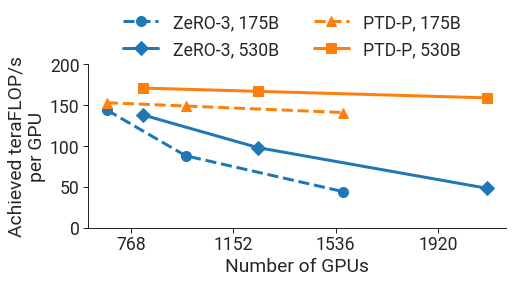

In [14]:
plot_comparison_with_zero(
    {"ZeRO-3, 175B": [(384, 144), (768, 88), (1536, 44)],
     "ZeRO-3, 530B": [(560, 138), (1120, 98), (2240, 48)],
     "PTD-P, 175B": [(384, 153), (768, 149), (1536, 141)],
     "PTD-P, 530B": [(560, 171), (1120, 167), (2240, 159)]},
    ["384", "768", "1152", "1536", "1920", "2304"],
    xlabel="Number of GPUs",
    ylabel="Achieved teraFLOP/s\nper GPU",
    ncol=2,
    output_filename="zero3_comparison_throughputs.pdf"
)